# Desafío Data Scientist NeuralWorks

## Código inicial
Importamos algunas librerías necesarias e instalamos otras.


In [36]:
#from google.colab import drive
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
from ydata_profiling import ProfileReport
import numpy as np
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Análisis exploratorio preliminar

Para resolver esta primera parte haremos un análisis exploratorio de los datos, haremos una limpieza básica en caso de ser necesario, veremos algunas métricas como la correlación, entre otras cosas.

In [37]:
#Montamos el drive
#drive.mount('/content/drive')

In [38]:
#Cargamos y revisamos el dataset
df = pd.read_csv('dataset_SCL.csv')
df.sample(10)

C:\Users\Miguel\AppData\Local\Temp\ipykernel_4528\3706357585.py:2: DtypeWarning:

Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.



,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
35683,2017-07-06 13:27:00,209,SCEL,SCIE,LAN,2017-07-06 13:33:00,209,SCEL,SCIE,LXP,6,7,2017,Jueves,N,Grupo LATAM,Santiago,Concepcion
31419,2017-06-17 23:55:00,481,SCEL,SAEZ,LAN,2017-06-18 00:05:00,481,SCEL,SAEZ,LAN,18,6,2017,Domingo,I,Grupo LATAM,Santiago,Buenos Aires
67698,2017-12-07 16:30:00,33,SCEL,SCTE,LAW,2017-12-07 16:27:00,33.00,SCEL,SCTE,JMR,7,12,2017,Jueves,N,Latin American Wings,Santiago,Puerto Montt
18308,2017-04-03 10:40:00,43,SCEL,SCVD,SKU,2017-04-03 10:39:00,43,SCEL,SCVD,SKU,3,4,2017,Lunes,N,Sky Airline,Santiago,Valdivia
10467,2017-02-06 15:35:00,445,SCEL,SAEZ,LAN,2017-02-06 16:26:00,445,SCEL,SAEZ,LAN,6,2,2017,Lunes,I,Grupo LATAM,Santiago,Buenos Aires
59273,2017-11-24 11:53:00,263,SCEL,SCTE,LAN,2017-11-24 12:11:00,263,SCEL,SCTE,LXP,24,11,2017,Viernes,N,Grupo LATAM,Santiago,Puerto Montt
28105,2017-06-19 11:40:00,6830,SCEL,LEMD,IBE,2017-06-19 11:27:00,6830,SCEL,LEMD,IBE,19,6,2017,Lunes,I,Iberia,Santiago,Madrid
18420,2017-04-01 07:00:00,71,SCEL,SCIE,SKU,2017-04-01 07:02:00,71,SCEL,SCIE,SKU,1,4,2017,Sabado,N,Sky Airline,Santiago,Concepcion
2753,2017-01-10 06:40:00,120,SCEL,SCFA,LAN,2017-01-10 06:43:00,120,SCEL,SCFA,LAN,10,1,2017,Martes,N,Grupo LATAM,Santiago,Antofagasta
51948,2017-10-15 18:10:00,521,SCEL,SAME,SKU,2017-10-15 18:10:00,521,SCEL,SAME,SKU,15,10,2017,Domingo,I,Sky Airline,Santiago,Mendoza


In [39]:
# Ocupamos info para ver los datos no-nulos y los tipos de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Notamos dos cosas enseguida:
1.   Hay un valor nulo en la columna Vlo-O al ser la única columna con una cuenta de 68205 datos no nulos.

2.   Las variables Vlo-O y Vlo-I al parecer contienen componentes no numéricas en algunas entradas porque de otro modo no se habrían importado como tipo objeto, eliminaremos esos datos.

3.   Hay varias variables con texto, por lo que usaremos ydata_profiling para el siguiente análisis exploratorio ya que nos permite operar en este tipo de datos para extraer por ejemplo correlaciones.



In [40]:
df['Vlo-I'] = pd.to_numeric(df['Vlo-I'], errors='coerce')
df['Vlo-O'] = pd.to_numeric(df['Vlo-O'], errors='coerce')
df.dropna(inplace=True)

Pasaremos las fechas de formato texto a formato datetime para poder operar sobre ellas a futuro, y verificaremos que no hayan problemas en la conversión.

In [41]:
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
#Verificamos si hubo alguna fecha con error
print(f'Al transformar a formato datetime se encontraron {df["Fecha-O"].isnull().sum()} con error en Fecha-O y {df["Fecha-I"].isnull().sum()} con error en Fecha-I')

Al transformar a formato datetime se encontraron 0 con error en Fecha-O y 0 con error en Fecha-I


In [42]:
profile = ProfileReport(df, title="Profiling Report")

In [43]:
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


In [44]:
profile.to_file("AnalisisExploratorio.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


**Algunas observaciones importantes que se pueden extraer del reporte preliminar:**



1. Hay variables con **valores constantes**:

  *   Ori-O y Ori-I tienen constante el valor "SCEL", lo que tiene sentido pues son datos del aeropuerto de Chile.

  *   SIGLAORI tiene el valor constante "Santiago", que sigue la misma lógica anterior.

2. Hay varios casos de **alta correlación** entre variables:

  *  Vlo-O y Vlo-I tienen una correlación del 99%

  *  Emp-I con OPERA tiene correlación de 1. La primera variable corresponde a la sigla de la compañía en la segunda variable. Emp-O también tiene muy alta correlación con estas dos variables pero en menor medida.

  * Las variables Des-I, Des-O, SIGLADES y TIPOVUELO están fuertemente correlacionadas con valores del superiores al 99% y en varios casos al 100%. Esto obviamente tiene relación con que los vuelos tiene destinos predeterminados con anterioridad y estos no cambian, los vuelos nacionales no pueden ocurrir en ciudades internacionales y viceversa o hay vuelos que solo los hace una aerolínea en particular.

3. La variable OPERA (y Emp-I) tiene un fuerte desbalanceo, la mayoría de los datos provienen de LATAM y Sky Airline. Lo mismo pasa con la variable AÑO, tiene todas sus entradas en el año 2017 salvo 2 en el año 2018.

**Con respecto a esta exploración preliminar para mejorar un modelo de predicción sería prudente :**

  *   Eliminar las variables constantes: Ori-O, Ori-I y SIGLAORI.
  *   Eliminar Vlo-O, convervar Vlo-I
  *   Eliminar OPERA, conservar Emp-I.
  *   Eliminar TIPOVUELO, SIGLADES y OPERA, conservar Des-I y Des-O.
  *   Eliminar AÑO.

Si bien estas variables no se utilizarían para entrenar un modelo, sí podrían ser de mucha utilidad para hacer visualizaciones por compañía o tipo de vuelo.

El supuesto de esto sería que a futuro se utilizará este modelo solo para data de Chile, si se quisiera integrar data de otros aeropuertos habría que reintegrar estas variables eliminadas y hacer otro análisis exploratorio.



## 2. Creación de variables 

Operamos sobre la fecha y creamos las variables solicitadas.

In [45]:
""" Por claridad podemos recordar que: - Diciembre = 12
                                       - Febrero = 2
                                       - Marzo = 3
                                       - Julio = 7
                                       - Septiembre = 9
"""

df['temporada_alta'] = df['Fecha-I'].apply(lambda fecha: 1 if (((fecha.month<=2) or (fecha.month==3 and fecha.day<=3) | (fecha.month==12 and fecha.day>=15))
                                                              or (fecha.month==7 and (fecha.day>=15 and fecha.day<=31))
                                                              or (fecha.month==9 and (fecha.day>=11 and fecha.day<=30)))
                                                           else 0)
df['dif_min'] = (df['Fecha-O']-df['Fecha-I'])
df['dif_min'] = df['dif_min'].dt.total_seconds()
df['atraso_15'] = df['dif_min'].apply(lambda tiempo: 1 if tiempo > 15*60
                                                       else 0)
df['periodo_dia'] = df['Fecha-I'].apply(lambda fecha: 'mañana' if (fecha.hour >= 5 and fecha.hour < 12)
                                                               else ('tarde' if (fecha.hour >= 12 and fecha.hour < 19)
                                                                    else 'noche'))

In [46]:
# Guardamos las variables generadas en el archivo "synthetic_features.csv"
aux= df[['dif_min','temporada_alta','periodo_dia','atraso_15']]
aux.to_csv('synthetic_features.csv', index=False)

## 3. Tasas de atraso

Como base vamos a calcular la tasa de atraso de todo el dataset y haremos un gráfico de torta con esta proporción.

In [47]:
#Veamos la proporción de vuelos atrasados y a tiempo
plot = pd.DataFrame(df['atraso_15'].value_counts())
plot['pie_plot'] = plot['atraso_15']/plot['atraso_15'].sum()
fig = px.pie(plot, names=plot.index, values='pie_plot', width=400, height = 400, title='Vuelos atrasados')
fig.show()

**Observación:** Si definimos el atraso en 15 minutos como nuestro target a predicir, en este dataset hay 12604 (~18.5%) casos de atraso y 55581 vuelos que salen a tiempo. En este sentido la proporción entre casos positivos y negativos es aproximadamente 1 es 4.4, por lo que tenemos un desbalanceo importante que podría generar un sesgo en nuestro modelo.


Vamos a calcular y mostrar las tasas de atraso utilizando tablas pivote para agrupar los atrasos según varias variables de interés

In [48]:
# Definimos una función que recibe una tabla pivote y la descompone en 3 variables
def determinador_ratios(df_aux):
  for index, row in df_aux.iterrows():
    if index == 'count':
      count = row
    else:
      sum = row
  series_1 = sum.rename('Atrasos')
  series_2 = (sum/count).rename('Tasa Atrasos')
  series_3 = count.rename('Total Vuelos').astype(int)
  df_aux = pd.concat([series_1,series_2,series_3],axis=1, join='inner')
  return df_aux.T

### Por destino

In [49]:
df_aux = pd.pivot_table(df, values= "atraso_15", index=['Des-I'], aggfunc=('sum','count')).T
determinador_ratios(df_aux)

Des-I,CYYZ,EGLL,EGYP,KATL,KDFW,KIAH,KJFK,KLAX,KMCO,KMIA,LEMD,LFPG,LIRF,MDPC,MMMX,MMUN,MPTO,NZAA,SAAR,SABE,SACO,SAEZ,SAME,SANT,SANU,SARI,SAWH,SAZN,SAZS,SBCT,SBFI,SBFL,SBGL,SBGR,SCAR,SCAT,SCBA,SCCF,SCCI,SCDA,SCFA,SCIE,SCIP,SCJO,SCNT,SCPQ,SCQP,SCSE,SCTE,SCVD,SEGU,SEQM,SEQU,SGAS,SKBO,SLCB,SLLP,SLVR,SPJC,SPSO,SULS,SUMU,YMML,YSSY
Atrasos,89.00,29.00,1.00,21.00,24.00,17.00,83.00,39.00,9.00,193.00,170.00,29.00,29.00,18.00,66.00,12.00,116.00,135.00,54.00,830.00,308.00,790.00,443.00,10.00,8.00,0.00,4.00,4.00,1.00,0.00,0.00,30.00,405.00,881.00,330.00,241.00,123.00,629.00,324.00,640.00,847.00,621.00,89.00,50.00,7.00,18.00,401.00,389.00,734.00,117.00,82.00,1.00,1.00,66.00,415.00,1.00,32.00,30.00,1213.00,0.00,1.00,220.00,21.00,113.00
Tasa Atrasos,0.31,0.14,1.00,0.06,0.07,0.05,0.22,0.25,0.26,0.19,0.19,0.08,0.11,0.33,0.09,0.19,0.06,0.37,0.40,0.27,0.30,0.24,0.27,0.26,0.23,0.00,0.67,0.11,0.50,0.00,0.00,0.19,0.28,0.25,0.14,0.14,0.15,0.12,0.15,0.17,0.15,0.16,0.20,0.19,0.09,0.08,0.16,0.16,0.17,0.16,0.19,1.00,1.00,0.28,0.26,1.00,0.15,0.25,0.23,0.00,0.17,0.21,0.55,0.58
Total Vuelos,283.00,205.00,1.00,358.00,356.00,333.00,383.00,155.00,34.00,1014.00,894.00,356.00,259.00,54.00,699.00,63.00,1850.00,361.00,136.00,3094.00,1022.00,3240.00,1625.00,38.00,35.00,1.00,6.00,37.00,2.00,3.00,1.00,162.00,1434.00,3570.00,2436.00,1779.00,843.00,5145.00,2105.00,3747.00,5786.00,3989.00,452.00,259.00,79.00,235.00,2583.00,2409.00,4357.00,753.00,423.00,1.00,1.00,232.00,1604.00,1.00,209.00,120.00,5268.00,1.00,6.00,1065.00,38.00,195.00


### Por aerolinea

In [50]:
df_aux = pd.pivot_table(df, values= "atraso_15", index=['OPERA'], aggfunc=('sum','count')).T
determinador_ratios(df_aux)

OPERA,Aerolineas Argentinas,Aeromexico,Air Canada,Air France,Alitalia,American Airlines,Austral,Avianca,British Airways,Copa Air,Delta Air,Gol Trans,Grupo LATAM,Iberia,JetSmart SPA,K.L.M.,Lacsa,Latin American Wings,Oceanair Linhas Aereas,Plus Ultra Lineas Aereas,Qantas Airways,Sky Airline,United Airlines
Atrasos,468.00,10.00,258.00,29.00,29.00,50.00,15.00,306.00,29.00,116.00,21.00,287.00,7303.00,36.00,196.00,21.00,11.00,681.00,43.00,29.00,113.00,2536.00,17.00
Tasa Atrasos,0.24,0.03,0.46,0.08,0.11,0.07,0.20,0.27,0.14,0.06,0.06,0.36,0.18,0.10,0.18,0.08,0.12,0.41,0.15,0.60,0.58,0.18,0.05
Total Vuelos,1949.00,351.00,565.00,356.00,259.00,755.00,74.00,1152.00,205.00,1850.00,358.00,806.00,40885.00,362.00,1095.00,251.00,92.00,1672.00,279.00,48.00,195.00,14293.00,333.00


### Por mes del año

In [51]:
df_aux = pd.pivot_table(df, values= "atraso_15", index=['MES'], aggfunc=('sum','count')).T
determinador_ratios(df_aux)

MES,1,2,3,4,5,6,7,8,9,10,11,12
Atrasos,978.00,843.00,629.00,584.00,824.00,851.00,1758.00,995.00,967.00,1363.00,1197.00,1615.00
Tasa Atrasos,0.16,0.15,0.11,0.12,0.16,0.17,0.29,0.17,0.17,0.23,0.20,0.25
Total Vuelos,6107.00,5561.00,5479.00,5018.00,5234.00,4979.00,5991.00,5742.00,5609.00,6031.00,6078.00,6356.00


### Por día de la semana

In [52]:
df_aux = pd.pivot_table(df, values= "atraso_15", index=['DIANOM'], aggfunc=('sum','count')).T
determinador_ratios(df_aux)

DIANOM,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes
Atrasos,1576.00,2043.00,2046.00,1633.00,1660.00,1363.00,2283.00
Tasa Atrasos,0.16,0.20,0.20,0.17,0.17,0.16,0.22
Total Vuelos,9793.00,10242.00,10128.00,9661.00,9720.00,8351.00,10290.00


### Por temporada (baja/alta)

In [53]:
df_aux = pd.pivot_table(df, values= "atraso_15", index=['temporada_alta'], aggfunc=('sum','count')).T
determinador_ratios(df_aux)

temporada_alta,0,1
Atrasos,8134.00,4470.00
Tasa Atrasos,0.18,0.20
Total Vuelos,45425.00,22760.00


### Por tipo de vuelo (internacional/nacional)

In [54]:
df_aux = pd.pivot_table(df, values= "atraso_15", index=['TIPOVUELO'], aggfunc=('sum','count')).T
determinador_ratios(df_aux)

TIPOVUELO,I,N
Atrasos,7044.00,5560.00
Tasa Atrasos,0.23,0.15
Total Vuelos,31228.00,36957.00


De las tablas anteriores podemos observar algunas conclusiones preliminares:
*  Hay una gran variabilidad en la tasa de atraso según el destino, en algunos casos superior al 50%, lo mismo pasa según las aerolíneas. Estos dos fenómenos pueden naturalmente estar relacionados.

*  En general se ve que la tasa de atraso es mayor en la segunda mitad del año y Julio es el mes con mayor tasa de atrasos.

*  Hay una diferencia sustancial entre la tasa de atraso entre vuelos nacionales e internacionales

*  Si bien hay cambios, no se observa una diferencia tan notoria según el día de la semana o por temporada alta/baja.

En base a esto, dependiendo del tipo de algoritmo para clasificar se esperaría que las variables que presentan mayor fluctiación en la tasa de atraso tuvieran mayor importancia a la hora de predecir el atraso.

Es importante tener esto presente ya que en casos donde hayan muy pocos datos puede llevar a sobreajustar el modelo. Por ejemplo destinos con 0 o 100% de tasa de atrasos pero con 1 o 3 vuelos.

## 4. Entrenamiento de modelos

In [55]:
X = df.drop(columns=["Fecha-I", "Fecha-O", "Ori-O", "Ori-I", "SIGLAORI", 
                     "Vlo-O", "OPERA", "TIPOVUELO", "SIGLADES", "AÑO",
                     "atraso_15", "dif_min"], 
            axis=0)
X

,Vlo-I,Des-I,Emp-I,Des-O,Emp-O,DIA,MES,DIANOM,temporada_alta,periodo_dia
0,226.00,KMIA,AAL,KMIA,AAL,1,1,Domingo,1,noche
1,226.00,KMIA,AAL,KMIA,AAL,2,1,Lunes,1,noche
2,226.00,KMIA,AAL,KMIA,AAL,3,1,Martes,1,noche
3,226.00,KMIA,AAL,KMIA,AAL,4,1,Miercoles,1,noche
4,226.00,KMIA,AAL,KMIA,AAL,5,1,Jueves,1,noche
...,...,...,...,...,...,...,...,...,...,...
68201,400.00,SPJC,JAT,SPJC,JAT,22,12,Viernes,1,tarde
68202,400.00,SPJC,JAT,SPJC,JAT,25,12,Lunes,1,tarde
68203,400.00,SPJC,JAT,SPJC,JAT,27,12,Miercoles,1,tarde
68204,400.00,SPJC,JAT,SPJC,JAT,29,12,Viernes,1,tarde


In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

columnas = X.columns
columnas_numericas = X._get_numeric_data().columns
columnas_categoricas = list(set(columnas) - set(columnas_numericas))
y = df['atraso_15']

# Separamos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10,)

# Haremos un hot encoding para pasar las variables categoricas a numeros dummy
preprocessor = ColumnTransformer([('onehot', OneHotEncoder(), 
                                   columnas_categoricas)],
                    remainder='passthrough')
preprocessor.fit_transform(X)
X_train_onehot = preprocessor.transform(X_train).toarray()
X_test_onehot = preprocessor.transform(X_test).toarray()
columnas_onehot = preprocessor.named_transformers_['onehot'].get_feature_names_out(columnas_categoricas)
columnas_finales = np.concatenate([columnas_numericas, columnas_onehot])
X_train = pd.DataFrame(X_train_onehot, columns=columnas_finales)
X_test = pd.DataFrame(X_test_onehot, columns=columnas_finales)

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
#Asignamos los modelos
xg = XGBClassifier(random_state=100)

#Asignamos los parámetros de los modelos a evaluar
param_xg = {}
param_xg['classifier__n_estimators'] = [10, 30, 50]
param_xg['classifier__max_depth'] = [5, 10]
param_xg['classifier__learning_rate'] = [0.01, 0.05]
param_xg['classifier__objective'] = ['binary:logistic']
param_xg['classifier'] = [xg]

#Definimos el pipeline para balancear las clases y ajustar el modelo
pipeline = Pipeline(steps = [['smote', SMOTEENN(random_state=100)],
                             ['classifier', xg]])

#Realizaremos una validación cruzada estratificada de 3 splits
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=100)

#Asignamos los parámetros a probar
params = [param_xg]

#Realizamos un GridSearchCV con métrica average precision sobre la categoria "Si"
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=params,
                           scoring='average_precision',
                           cv=stratified_kfold,
                           n_jobs=-1)

#Entrenamos los modelos
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTEENN(random_state=100)],
                                       ['classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      featu...
                                                       max_depth=10,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=50,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       predictor=None,
                                                       random_state=100, ...)],
                          'classifier__learning_rate': [0.01, 0.05],
                          'classifier__max_depth': [5, 10],
                          'classifier__n_estimators': [10, 30, 50],
                          'classifier__objective': ['binary:logistic']}],
             scoring='average_precision')

In [58]:
#Hiperparámetros del mejor estimador
print(grid_search.best_params_)

{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...), 'classifier__learning_rate': 0.05, 'classifier__max_depth': 10, 'classifier__n_estimators': 50, 'classifier__objective': 'binary:logistic'}


In [59]:
#Verificamos el rendimiento en el dataset de testeo
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Rendimiento Cross-validation: {cv_score}\nRendimiento en Test: {test_score}')

#Guardamos el mejor estimador
estimator = grid_search.best_estimator_
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)

Rendimiento Cross-validation: 0.36010963684289127
Rendimiento en Test: 0.34321059385364605


In [60]:
#Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81     11116
           1       0.33      0.51      0.40      2521

    accuracy                           0.72     13637
   macro avg       0.60      0.64      0.61     13637
weighted avg       0.77      0.72      0.74     13637



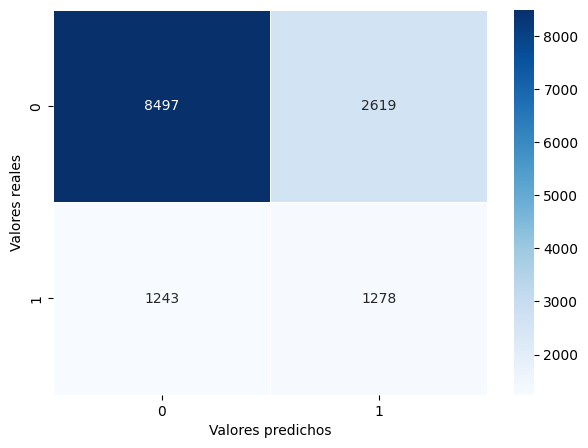

In [61]:

#Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

#Graficamos mediante un heatmap
fig = plt.figure(figsize=(7,5))
ax = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues", linewidths=0.5)
ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores reales')
plt.show()

In [62]:
#Calculamos las tasas de verdadero positivo y falso positivo
fpr, tpr, umbral = roc_curve(y_test, y_pred_proba[::,1])

#Calculamos el área bajo la curva ROC
area_curva = auc(fpr, tpr)

#Graficamos la curva ROC
fig = px.area(
    x=fpr, y=tpr,
    title=f'Curva ROC con AUC={area_curva:.3f}',
    labels=dict(x='Tasa de Falsos Positivos', y='Tasa de Verdaderos Positivos'),
    width=800, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.show()